In [2]:
import json
data = json.load(open('goodreads_books.json'))


: 

In [53]:
!!pip install ijson
!!pip install pandas

['Requirement already satisfied: pandas in /home/hamed/anaconda3/envs/myenv/lib/python3.12/site-packages (2.1.4)',
 'Requirement already satisfied: numpy<2,>=1.26.0 in /home/hamed/anaconda3/envs/myenv/lib/python3.12/site-packages (from pandas) (1.26.2)',
 'Requirement already satisfied: python-dateutil>=2.8.2 in /home/hamed/anaconda3/envs/myenv/lib/python3.12/site-packages (from pandas) (2.8.2)',
 'Requirement already satisfied: pytz>=2020.1 in /home/hamed/anaconda3/envs/myenv/lib/python3.12/site-packages (from pandas) (2023.3.post1)',
 'Requirement already satisfied: tzdata>=2022.1 in /home/hamed/anaconda3/envs/myenv/lib/python3.12/site-packages (from pandas) (2023.3)',
 'Requirement already satisfied: six>=1.5 in /home/hamed/anaconda3/envs/myenv/lib/python3.12/site-packages (from python-dateutil>=2.8.2->pandas) (1.16.0)']

In [23]:
import json
import pandas as pd
data = []
rows_list = []
books = pd.DataFrame(data = data, columns=[
    'text_reviews_count', 'average_rating',
    'similar_books', 'authors', 'publisher',
    'num_pages', 'publication_year','book_id',
    'ratings_count', 'title'
])
count = 0
with open('goodreads_books.json',"r") as jsonfile:
    while True:
        count +=1
        if count == 1000000:
            break
        data = jsonfile.readline()
        if not data:
            break
        data = json.loads(data)
 
        try:
            text_reviews_count = int(data['text_reviews_count'])
            average_rating = float(data['average_rating'])
            publication_year = int(data['publication_year'])
            num_pages = int(data['num_pages'])
            ratings_count = int(data['ratings_count'])
        except Exception:
            continue

        dict1 = {
        'text_reviews_count':text_reviews_count,
        'average_rating': average_rating,
        'similar_books': data['similar_books'],
        'authors': data['authors'],
        'publisher': data['publisher'],
        'num_pages': num_pages,
        'publication_year': publication_year,
        'book_id': data['book_id'],
        'ratings_count': ratings_count,
        'title': data['title']
        }
        rows_list.append(dict1)

books = pd.DataFrame(rows_list)
print(books.head())

   text_reviews_count  average_rating  \
0                   1            4.00   
1                   7            4.03   
2                3282            3.49   
3                   7            4.13   
4                   6            4.22   

                                       similar_books  \
0                                                 []   
1  [19997, 828466, 1569323, 425389, 1176674, 2627...   
2  [6604176, 6054190, 2285777, 82641, 7569453, 70...   
3                                                 []   
4  [948696, 439885, 274955, 12978730, 372986, 216...   

                                  authors               publisher  num_pages  \
0   [{'author_id': '604031', 'role': ''}]      St. Martin's Press        256   
1    [{'author_id': '10333', 'role': ''}]  Nelson Doubleday, Inc.        600   
2     [{'author_id': '9212', 'role': ''}]             Atria Books        368   
3  [{'author_id': '3041852', 'role': ''}]    Yesterday's Classics        162   
4    [{'author_i

In [24]:
books.dtypes

text_reviews_count      int64
average_rating        float64
similar_books          object
authors                object
publisher              object
num_pages               int64
publication_year        int64
book_id                object
ratings_count           int64
title                  object
dtype: object

In [15]:
# cols = ['average_rating','text_reviews_count']
# mask = books[cols].applymap(lambda x: isinstance(x, (int, float)))
# books[cols] = books[cols].where(mask)

/tmp/ipykernel_16787/2885143642.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = books[cols].applymap(lambda x: isinstance(x, (int, float)))


In [25]:
books['average_rating'].describe()

count    640579.000000
mean          3.850481
std           0.518436
min           0.000000
25%           3.620000
50%           3.890000
75%           4.130000
max           5.000000
Name: average_rating, dtype: float64

In [26]:
books['text_reviews_count'].describe()

count    640579.000000
mean         33.867632
std         436.716593
min           0.000000
25%           2.000000
50%           4.000000
75%          13.000000
max      142645.000000
Name: text_reviews_count, dtype: float64

In [27]:
books['publication_year'].describe()

count    640579.000000
mean       2007.842998
std         288.632891
min           0.000000
25%        2004.000000
50%        2011.000000
75%        2014.000000
max       65535.000000
Name: publication_year, dtype: float64

In [27]:
!!pip install matplotlib
!!pip install scipy

['Collecting scipy',
 '  Downloading scipy-1.12.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/60.4 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b20.5/60.4 kB\x1b \x1b584.7 kB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b60.4/60.4 kB\x1b \x1b960.0 kB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: numpy<1.29.0,>=1.22.4 in /home/hamed/anaconda3/envs/myenv/lib/python3.12/site-packages (from scipy) (1.26.2)',
 'Downloading scipy-1.12.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.8 MB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/37.8 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.1/37.8 MB\x1b \x1b4.7 MB/s\x1b eta \x1b0:00:08\x1b',
 '\x1

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

In [17]:
G = nx.Graph()

In [20]:
G.add_edge(1,2)
G.add_edge(1,2, weight=0.9)
G.add_edge(5,'ArithmeticError')
G.add_node('aaa')

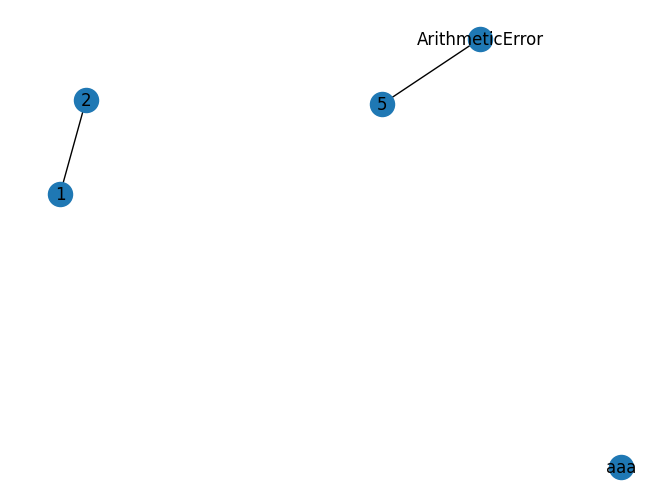

In [21]:
nx.draw_spring(G, with_labels=True)
plt.show()

In [22]:
edge_list = [(1,2),(2,3),(4,5),(1,3),(1,10),(5,3),(2,7),(7,1),(5,9)]

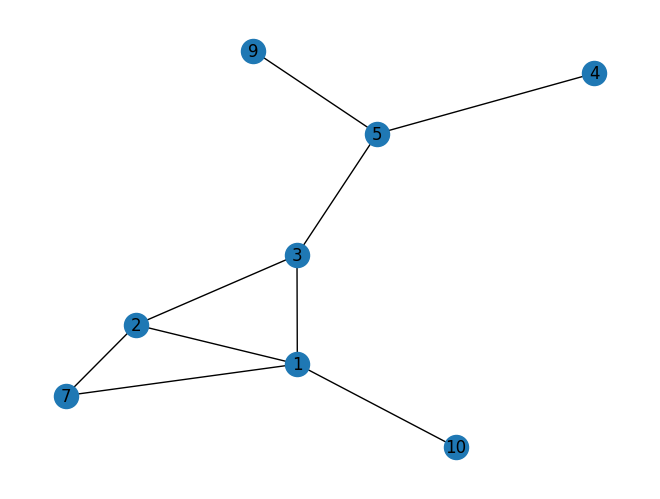

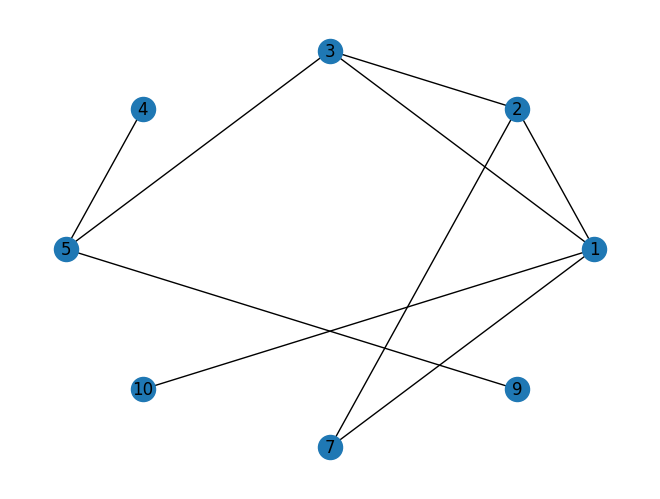

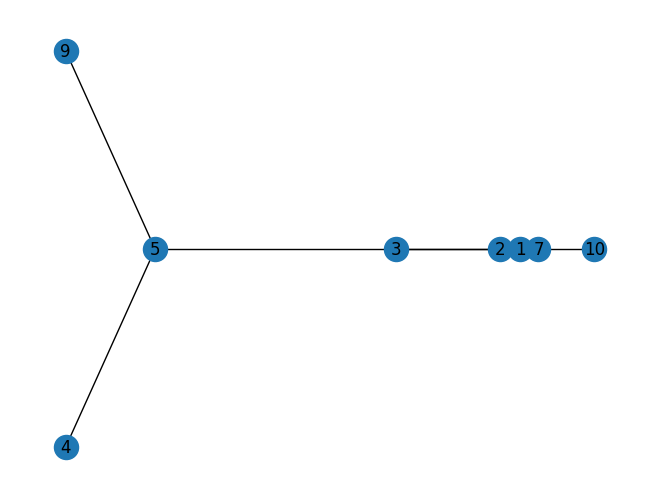

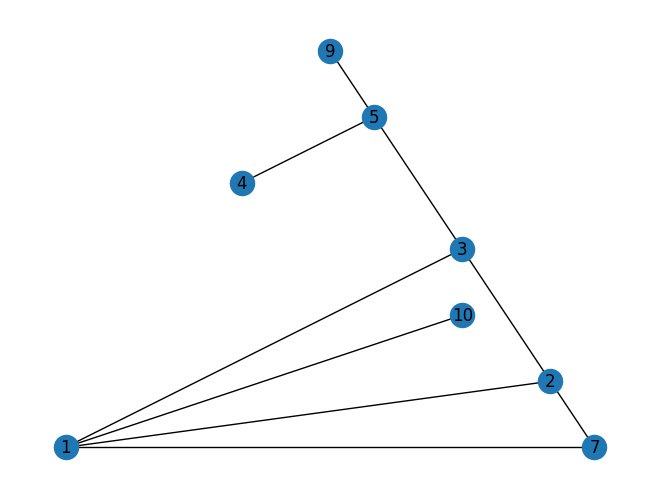

In [34]:
G = nx.from_edgelist(edgelist=edge_list)
G.add_edges_from(edge_list)
nx.draw_spring(G, with_labels=True)
plt.show()
nx.draw_circular(G, with_labels=True)
plt.show()
nx.draw_spectral(G, with_labels=True)
plt.show()
nx.draw_planar(G,with_labels=True)
plt.show()

In [26]:
print(nx.adjacency_matrix(G))

ModuleNotFoundError: No module named 'scipy'

In [35]:
print(dict(G.degree))

{1: 4, 2: 3, 3: 3, 4: 1, 5: 3, 10: 1, 7: 2, 9: 1}


In [42]:
print(nx.shortest_path(G))

{1: {1: [1], 2: [1, 2], 3: [1, 3], 10: [1, 10], 7: [1, 7], 5: [1, 3, 5], 4: [1, 3, 5, 4], 9: [1, 3, 5, 9]}, 2: {2: [2], 1: [2, 1], 3: [2, 3], 7: [2, 7], 10: [2, 1, 10], 5: [2, 3, 5], 4: [2, 3, 5, 4], 9: [2, 3, 5, 9]}, 3: {3: [3], 2: [3, 2], 1: [3, 1], 5: [3, 5], 7: [3, 2, 7], 10: [3, 1, 10], 4: [3, 5, 4], 9: [3, 5, 9]}, 4: {4: [4], 5: [4, 5], 3: [4, 5, 3], 9: [4, 5, 9], 2: [4, 5, 3, 2], 1: [4, 5, 3, 1], 7: [4, 5, 3, 2, 7], 10: [4, 5, 3, 1, 10]}, 5: {5: [5], 4: [5, 4], 3: [5, 3], 9: [5, 9], 2: [5, 3, 2], 1: [5, 3, 1], 7: [5, 3, 2, 7], 10: [5, 3, 1, 10]}, 10: {10: [10], 1: [10, 1], 2: [10, 1, 2], 3: [10, 1, 3], 7: [10, 1, 7], 5: [10, 1, 3, 5], 4: [10, 1, 3, 5, 4], 9: [10, 1, 3, 5, 9]}, 7: {7: [7], 2: [7, 2], 1: [7, 1], 3: [7, 2, 3], 10: [7, 1, 10], 5: [7, 2, 3, 5], 4: [7, 2, 3, 5, 4], 9: [7, 2, 3, 5, 9]}, 9: {9: [9], 5: [9, 5], 4: [9, 5, 4], 3: [9, 5, 3], 2: [9, 5, 3, 2], 1: [9, 5, 3, 1], 7: [9, 5, 3, 2, 7], 10: [9, 5, 3, 1, 10]}}


In [43]:
print(nx.degree_centrality(G))

{1: 0.5714285714285714, 2: 0.42857142857142855, 3: 0.42857142857142855, 4: 0.14285714285714285, 5: 0.42857142857142855, 10: 0.14285714285714285, 7: 0.2857142857142857, 9: 0.14285714285714285}


In [44]:
print(nx.closeness_centrality(G))

{1: 0.5833333333333334, 2: 0.5384615384615384, 3: 0.6363636363636364, 4: 0.3684210526315789, 5: 0.5384615384615384, 10: 0.3888888888888889, 7: 0.4117647058823529, 9: 0.3684210526315789}


In [45]:
print(nx.betweenness_centrality(G))

{1: 0.38095238095238093, 2: 0.09523809523809523, 3: 0.5714285714285714, 4: 0.0, 5: 0.5238095238095237, 10: 0.0, 7: 0.0, 9: 0.0}


In [49]:
print(nx.density(G))
print(nx.diameter(G))
# print(list(nx.eulerian_path(G)))
print(list(nx.find_cliques(G)))

0.32142857142857145
4
[[1, 10], [1, 2, 3], [1, 2, 7], [4, 5], [5, 9], [5, 3]]


In [51]:
print(list(nx.bridges(G)))

[(1, 10), (3, 5), (4, 5), (5, 9)]


In [52]:
print(list(nx.connected_components(G)))

[{1, 2, 3, 4, 5, 7, 9, 10}]
